In [2]:
# Feature Extraction & Transformation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Part 1: Creating Interaction Features (Titanic dataset)

# Load Titanic dataset
titanic = sns.load_dataset("titanic")
print("Shape before cleaning:", titanic.shape)


Shape before cleaning: (891, 15)


In [4]:
# Select relevant columns
df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()
# .dropna() → removes rows with missing values so we don’t run into errors
print("Shape after cleaning:", df.shape)

Shape after cleaning: (712, 8)


In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


survived → target variable (0 = died, 1 = survived).

pclass → passenger class (1st, 2nd, 3rd).

sex, age, sibsp (siblings/spouses), parch (parents/children), fare, embarked.

In [7]:
# Create interaction features
df['family_size'] = df['sibsp'] + df['parch'] + 1
# Creates a new feature: total number of people traveling with passenger (including self).
# Example: If sibsp=1, parch=2 → family_size = 1 + 2 + 1 = 4.

In [8]:
df['age_fare_interaction'] = df['age'] * df['fare']
# Creates another interaction feature by multiplying age × fare.
# This could capture relationships like: “Do older, richer people (high fare) survive differently?”

In [9]:
df['is_child'] = (df['age'] < 12).astype(int)

Creates a binary feature:

1 if passenger is a child (age < 12).

0 otherwise.

.astype(int) → converts boolean (True/False) into numeric (1/0).

In [10]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

print("\nSample with new features:")
print(df.head())


Sample with new features:
   survived  pclass   age  sibsp  parch     fare  family_size  \
0         0       3  22.0      1      0   7.2500            2   
1         1       1  38.0      1      0  71.2833            2   
2         1       3  26.0      0      0   7.9250            1   
3         1       1  35.0      1      0  53.1000            2   
4         0       3  35.0      0      0   8.0500            1   

   age_fare_interaction  is_child  sex_male  embarked_Q  embarked_S  
0              159.5000         0      True       False        True  
1             2708.7654         0     False       False       False  
2              206.0500         0     False       False        True  
3             1858.5000         0     False       False        True  
4              281.7500         0      True       False        True  


Converts categorical columns (sex, embarked) into numeric using one-hot encoding.

Example: sex → replaced with sex_male (1 if male, 0 if female).

drop_first=True → avoids dummy variable trap (removes redundant column).

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   survived              712 non-null    int64  
 1   pclass                712 non-null    int64  
 2   age                   712 non-null    float64
 3   sibsp                 712 non-null    int64  
 4   parch                 712 non-null    int64  
 5   fare                  712 non-null    float64
 6   family_size           712 non-null    int64  
 7   age_fare_interaction  712 non-null    float64
 8   is_child              712 non-null    int64  
 9   sex_male              712 non-null    bool   
 10  embarked_Q            712 non-null    bool   
 11  embarked_S            712 non-null    bool   
dtypes: bool(3), float64(3), int64(6)
memory usage: 57.7 KB


What is PCA?

Principal Component Analysis (PCA) is a dimensionality reduction technique used in Machine Learning. It transforms a dataset with many features into a smaller set of new features (called principal components) while keeping as much information (variance) as possible.

PCA helps in:

Reducing noise.

Avoiding overfitting.

Visualizing high-dimensional data in 2D or 3D.

**Example of PCA on IRIS dataset**

In [12]:
# Part 2: PCA on Iris Dataset

from sklearn.datasets import load_iris


In [13]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
print(X[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


Loads the Iris dataset (classic ML dataset: flower measurements).

X → input features (4 columns: sepal length, sepal width, petal length, petal width).

y → target (0,1,2 = species).

In [14]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

PCA requires data to be standardized (mean = 0, variance = 1).

StandardScaler does this:

Subtracts mean, divides by standard deviation.

fit_transform(X) → fits scaler on data and applies transformation.

In [15]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nExplained variance ratio:", pca.explained_variance_ratio_)
# Shows how much information (variance) is preserved in PC1 & PC2.
# Example: [0.73, 0.23] means PC1 explains 73% of variance, PC2 explains 23%.


Explained variance ratio: [0.72962445 0.22850762]


Creates a PCA object with 2 components (reduce 4D → 2D).

fit_transform → learns PCA transformation and applies it.

X_pca → new dataset with 2 principal components.

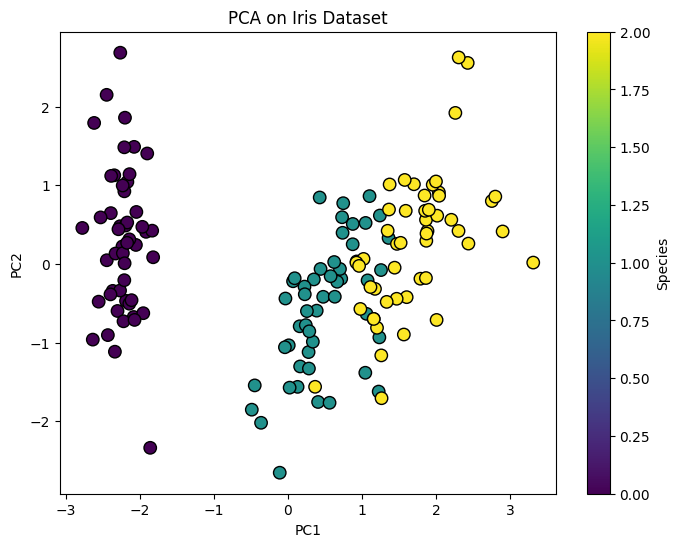

In [16]:
# Plot PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', edgecolor='k', s=80)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris Dataset")
plt.colorbar(label="Species")
plt.show()

**Example of PCA on Titanic Dataset**

In [17]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1) Load data
df = sns.load_dataset("titanic").copy()

# We'll use only numeric columns to keep it simple
num_cols = ["age", "fare", "pclass", "sibsp", "parch"]

df = df.dropna(subset=["survived"]).copy()
y = df["survived"].astype(int)



In [18]:
#  Simple imputation for numerics (median)
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

X = df[num_cols].astype(float)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)



In [19]:
# PCA to 2 components
pca = PCA(n_components=2, svd_solver="full")
X_pca = pca.fit_transform(X_std)
evr = pca.explained_variance_ratio_
print("Explained variance ratio (PC1, PC2):", evr, " | cumulative:", evr.sum())

Explained variance ratio (PC1, PC2): [0.33960812 0.32520788]  | cumulative: 0.6648159969553279


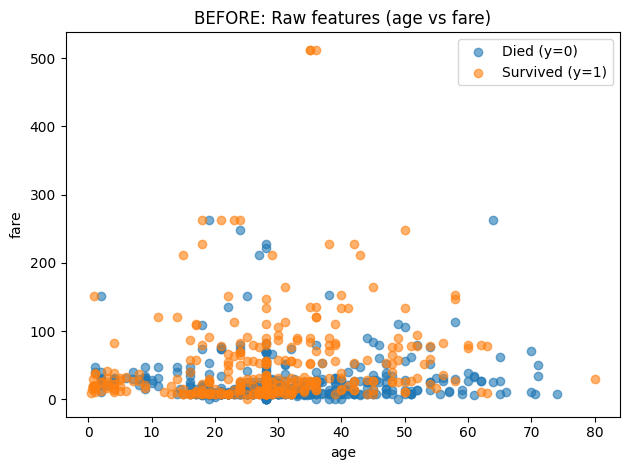

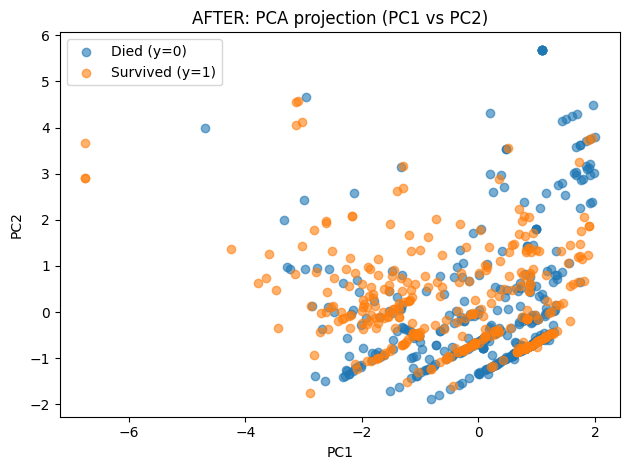

In [20]:
# 5) BEFORE: Raw-space visualization (pick two original features)
plt.figure()
mask0 = (y == 0).values
mask1 = (y == 1).values
plt.scatter(X.loc[mask0, "age"], X.loc[mask0, "fare"], alpha=0.6, label="Died (y=0)")
plt.scatter(X.loc[mask1, "age"], X.loc[mask1, "fare"], alpha=0.6, label="Survived (y=1)")
plt.xlabel("age"); plt.ylabel("fare"); plt.title("BEFORE: Raw features (age vs fare)")
plt.legend()
plt.tight_layout()
plt.show()

# 6) AFTER: PCA-space visualization (PC1 vs PC2)
plt.figure()
plt.scatter(X_pca[mask0, 0], X_pca[mask0, 1], alpha=0.6, label="Died (y=0)")
plt.scatter(X_pca[mask1, 0], X_pca[mask1, 1], alpha=0.6, label="Survived (y=1)")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("AFTER: PCA projection (PC1 vs PC2)")
plt.legend()
plt.tight_layout()
plt.show()

**Comparison of ANOVA selecting two high variance features and PCA selecting two principal components**

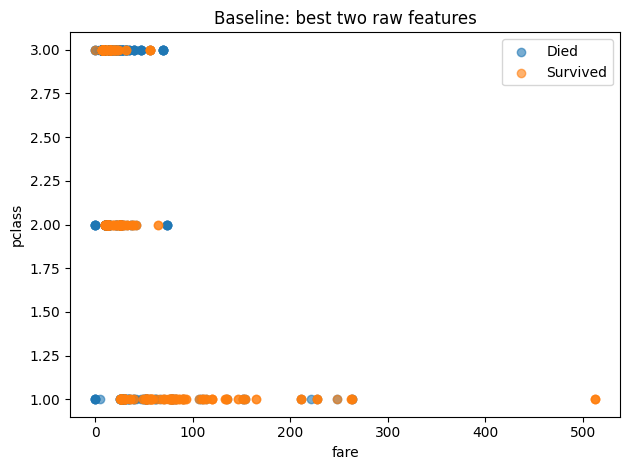

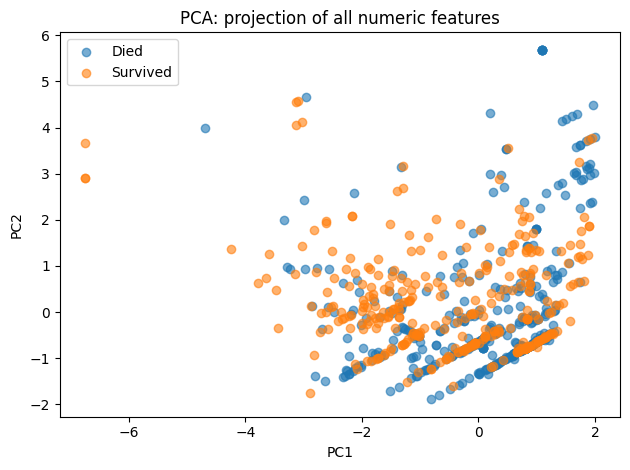

In [21]:
import seaborn as sns, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load & prep
df = sns.load_dataset("titanic").dropna(subset=["survived"]).copy()
y = df["survived"].astype(int)
num = ["age","fare","pclass","sibsp","parch"]
for c in num: df[c] = df[c].fillna(df[c].median())
X = df[num].astype(float)

# Pick best two raw features (univariate) using ANOVA
fvals, _ = f_classif(X, y)
best2 = np.argsort(fvals)[-2:]
f1, f2 = X.columns[best2]

# Plot baseline: best two raw features
plt.figure();
plt.scatter(X[f1][y==0], X[f2][y==0], alpha=0.6, label="Died")
plt.scatter(X[f1][y==1], X[f2][y==1], alpha=0.6, label="Survived")
plt.xlabel(f1); plt.ylabel(f2); plt.title("Baseline: best two raw features"); plt.legend(); plt.tight_layout(); plt.show()

# PCA on the same inputs
X_std = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2, svd_solver="full").fit_transform(X_std)

# Plot PCA: PC1 vs PC2
plt.figure();
plt.scatter(X_pca[y==0,0], X_pca[y==0,1], alpha=0.6, label="Died")
plt.scatter(X_pca[y==1,0], X_pca[y==1,1], alpha=0.6, label="Survived")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("PCA: projection of all numeric features"); plt.legend(); plt.tight_layout(); plt.show()


How PCA impacts the accuracy of the models: Applying logistic regression  (i) on seven features titanic dataset and (ii) two features obtained through PCA  

In [22]:
# Titanic: "All features" vs "PCA → 2 features" (no pipelines)
import seaborn as sns, pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 1) Load & target
df = sns.load_dataset("titanic").copy()
df = df.dropna(subset=["survived"])
y = df["survived"].astype(int)

# 2) Choose a modest feature set (numeric + a couple categoricals)
num_cols = ["age", "fare", "pclass", "sibsp", "parch"]
cat_cols = ["sex", "embarked"]   # simple, low-cardinality

# Impute: median for numeric, mode for categoricals
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode().iloc[0])

# One-hot encode categoricals (no label info leakage)
X = pd.get_dummies(df[num_cols + cat_cols], drop_first=True)

# Train/test split (stratified)
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Scale (fit on train, apply to test)
scaler = StandardScaler()
Xtr_sc = scaler.fit_transform(X_tr)
Xte_sc = scaler.transform(X_te)

# 4A) Baseline: Logistic Regression on ALL features
clf_all = LogisticRegression(max_iter=1000)
clf_all.fit(Xtr_sc, y_tr)
proba_all = clf_all.predict_proba(Xte_sc)[:, 1]
pred_all = (proba_all >= 0.5).astype(int)
print("ALL features — Acc:", accuracy_score(y_te, pred_all),
      "AUC:", roc_auc_score(y_te, proba_all), "| dims:", Xtr_sc.shape[1])

# 4B) PCA → 2 components, then Logistic Regression
pca = PCA(n_components=2, svd_solver="full")
Xtr_pca = pca.fit_transform(Xtr_sc)
Xte_pca = pca.transform(Xte_sc)
print("PCA EVR (PC1, PC2):", pca.explained_variance_ratio_,
      "| cumulative:", pca.explained_variance_ratio_.sum())

clf_pca2 = LogisticRegression(max_iter=1000)
clf_pca2.fit(Xtr_pca, y_tr)
proba_pca2 = clf_pca2.predict_proba(Xte_pca)[:, 1]
pred_pca2 = (proba_pca2 >= 0.5).astype(int)
print("PCA→2 comps — Acc:", accuracy_score(y_te, pred_pca2),
      "AUC:", roc_auc_score(y_te, proba_pca2), "| dims:", Xtr_pca.shape[1])

ALL features — Acc: 0.8044692737430168 AUC: 0.8433465085638999 | dims: 8
PCA EVR (PC1, PC2): [0.22969511 0.21202173] | cumulative: 0.441716845103451
PCA→2 comps — Acc: 0.659217877094972 AUC: 0.7318840579710144 | dims: 2


Advantages of PCA

Reduces dataset size while keeping important info.

Improves training speed of ML models.

Helps visualization.

Removes multicollinearity (features that are highly correlated).


Limitations

PCA is unsupervised (doesn’t consider target labels).

Sometimes difficult to interpret PCs (they are combinations of original features).

Works best when linear relationships exist.